PREDICTION OF STUDENTS ACADEMIC STANDING 

Introduction
In the rapidly evolving field of education, institutions are increasingly leveraging data-driven methods to enhance student support systems and improve academic outcomes. One of the critical areas of focus is the ability to accurately predict student academic standing based on a combination of demographic, academic, and socioeconomic factors. Early identification of students who may be at risk academically enables timely intervention, targeted support, and informed decision-making by educators and administrators.

This project aims to build and evaluate predictive models for classifying student academic standing using a rich dataset that includes features such as marital status, application mode, attendance type, parental education and occupation, prior academic background, age, gender, and various performance indicators from the first and second semesters. The target variable is a multi-class outcome representing different academic standings, allowing for a more nuanced understanding of student performance levels.

To ensure robust analysis and accurate predictions, we employ four machine learning classification algorithms: Logistic Regression, Decision Tree, Random Forest, and XGBoost. These models are chosen for their interpretability, scalability, and effectiveness in handling structured data. The dataset is preprocessed with label encoding for categorical variables and standardized where necessary to enhance model performance.

Model evaluation is carried out using metrics such as accuracy, confusion matrices, and classification reports. Additionally, we analyze feature importance to identify the most influential factors contributing to student

✅ Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline if using Jupyter
%matplotlib inline

# Set seaborn style
sns.set(style='whitegrid', palette='Set2')


✅ Step 2: Load and Preview the Dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

<IPython.core.display.Javascript object>

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [8]:
# Correct a column name that has a typo and replace single quotes with underscores
df.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Age at enrollment": "Age"}, inplace = True)

# Replace white space in the column names with underscore
df.columns = df.columns.str.replace(' ', '_')

# Remove the parenthesis
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

In [9]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target'],


✅ Step 3: Check for Missing Values

In [3]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])


Missing values:
 Series([], dtype: int64)


✅ Step 4: Summary Statistics (Numerical Features)

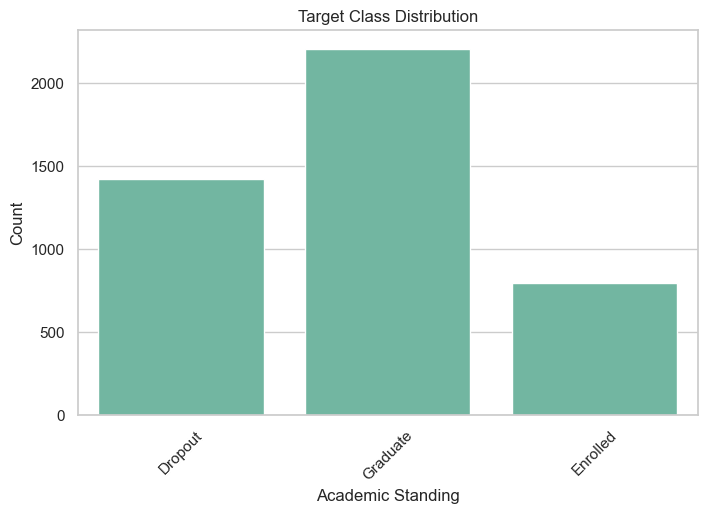

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [6]:
# Target class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Target')
plt.title('Target Class Distribution')
plt.xlabel('Academic Standing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Optional: see percentage distribution
print(df['Target'].value_counts())


✅ Step 6: Categorical Feature Distributions
Here’s how you can visualize the top categorical features vs. Target

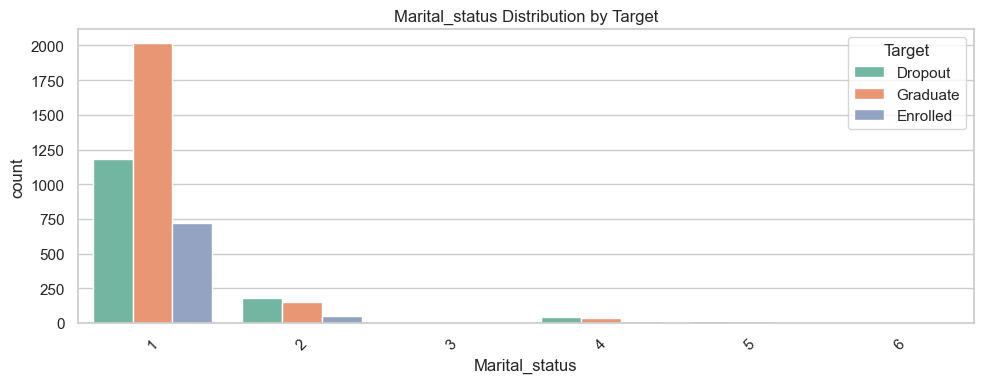

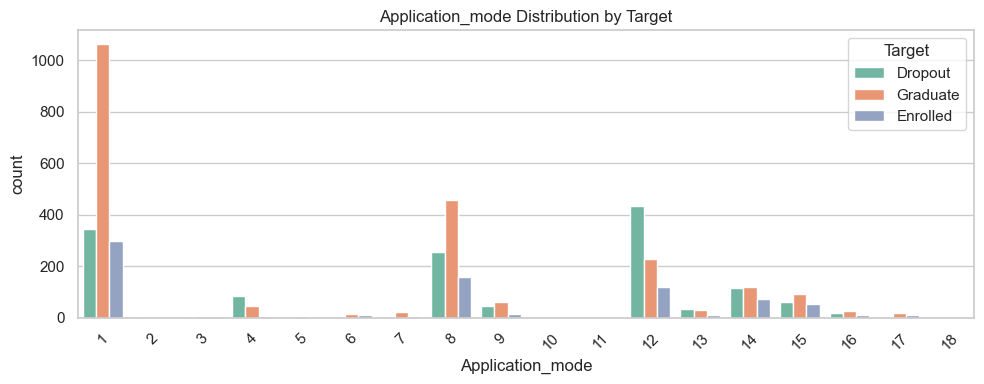

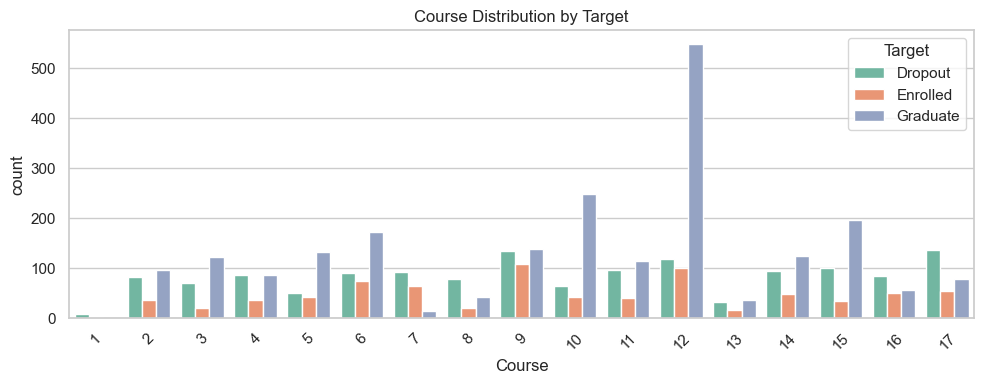

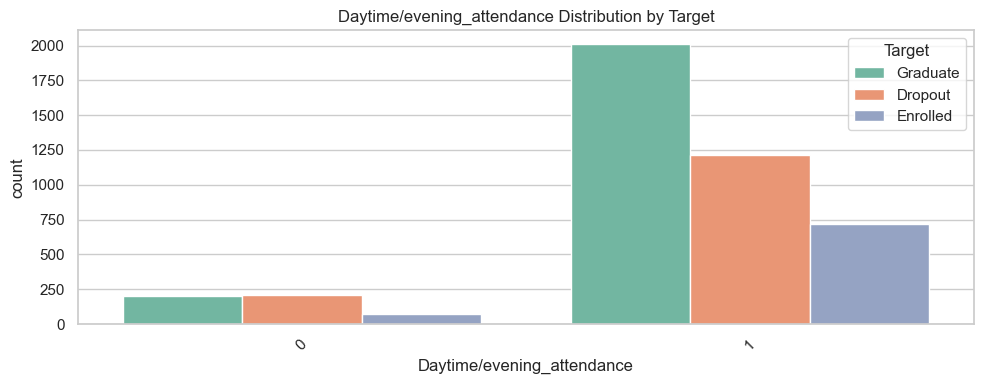

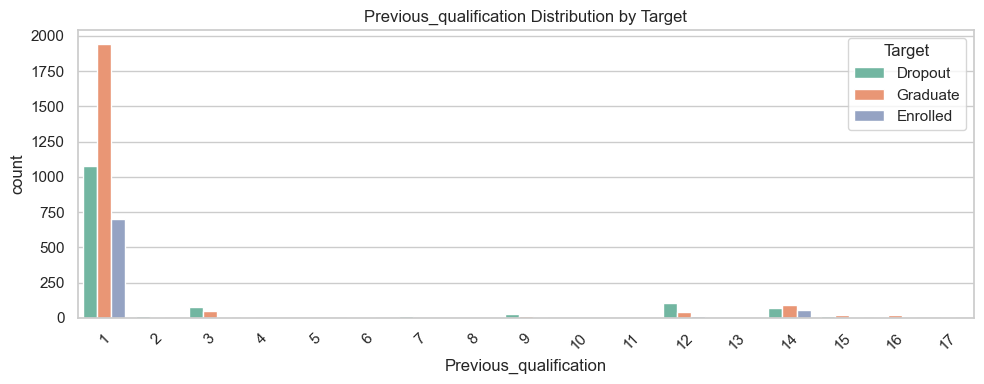

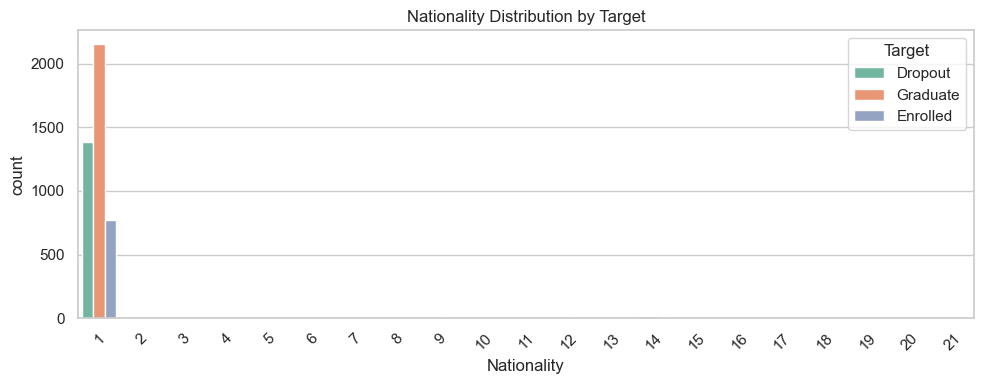

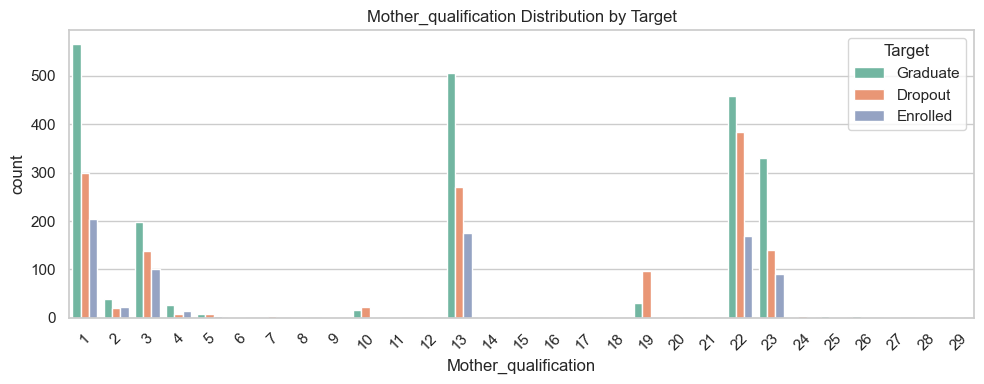

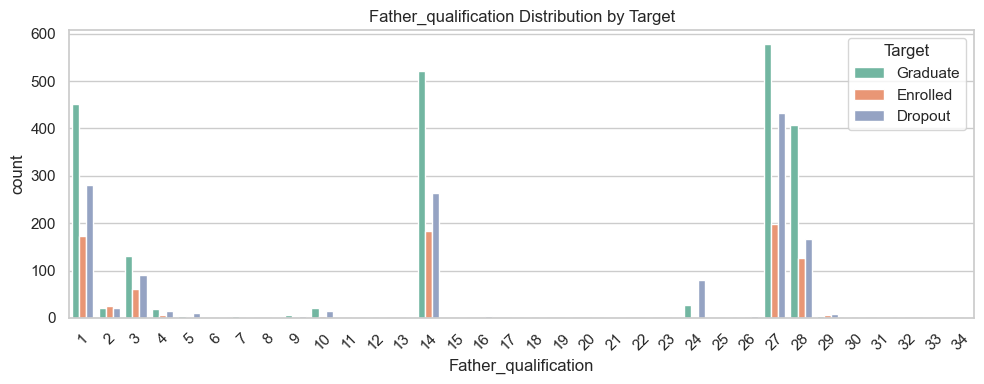

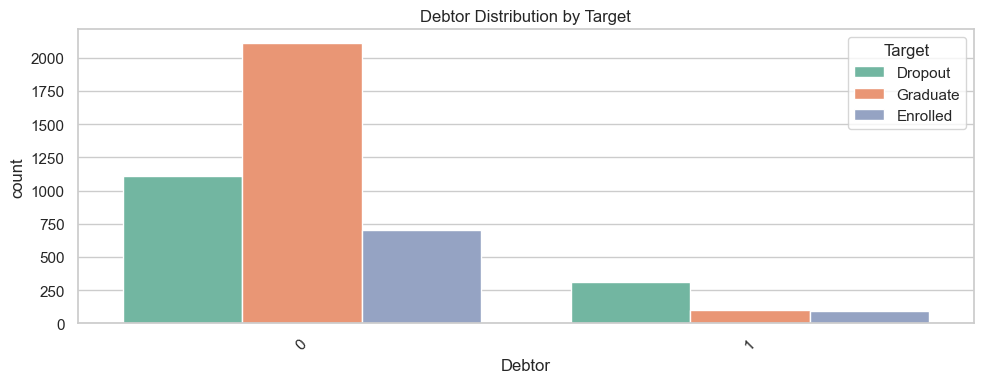

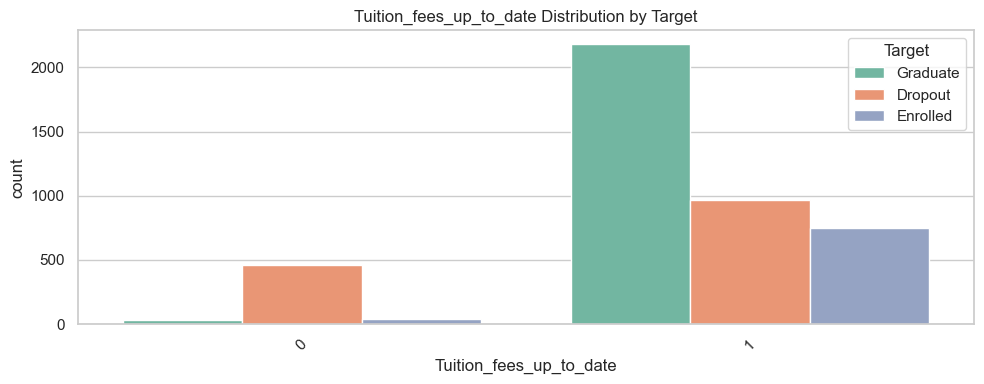

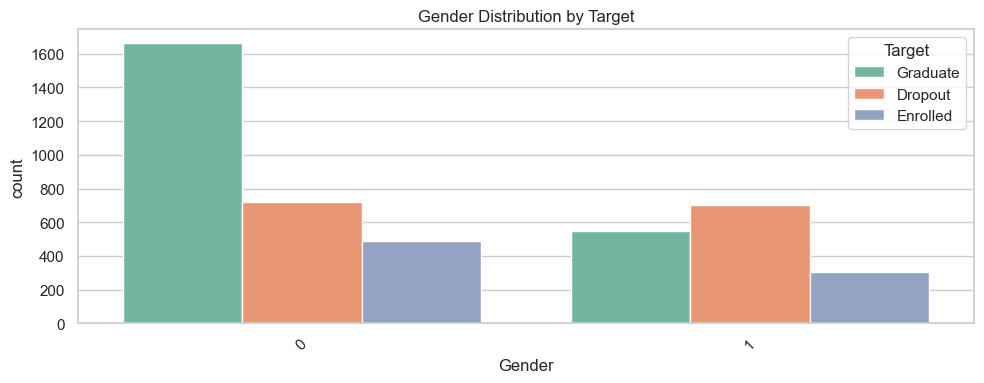

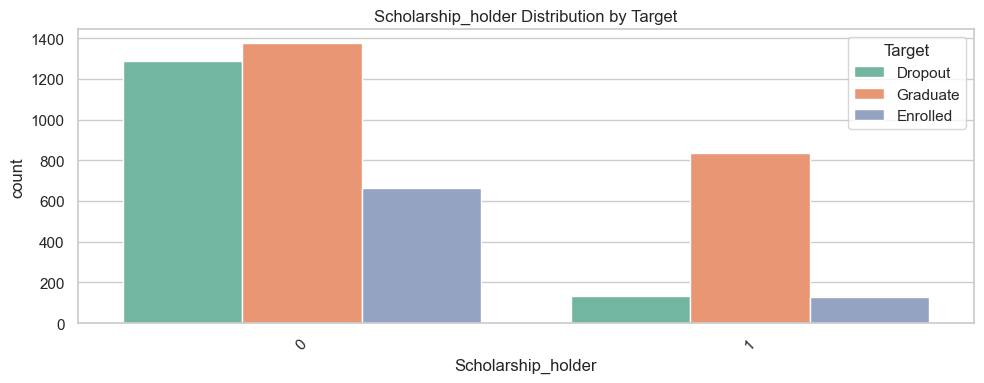

In [11]:
categorical_features = ['Marital_status', 'Application_mode', 'Course', 
                        'Daytime/evening_attendance', 'Previous_qualification', 
                        'Nationality', 'Mother_qualification', 
                        'Father_qualification', 'Debtor', 
                        'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='Target')
    plt.title(f'{col} Distribution by Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


✅ Step 7: Correlation Heatmap (Numerical Features)

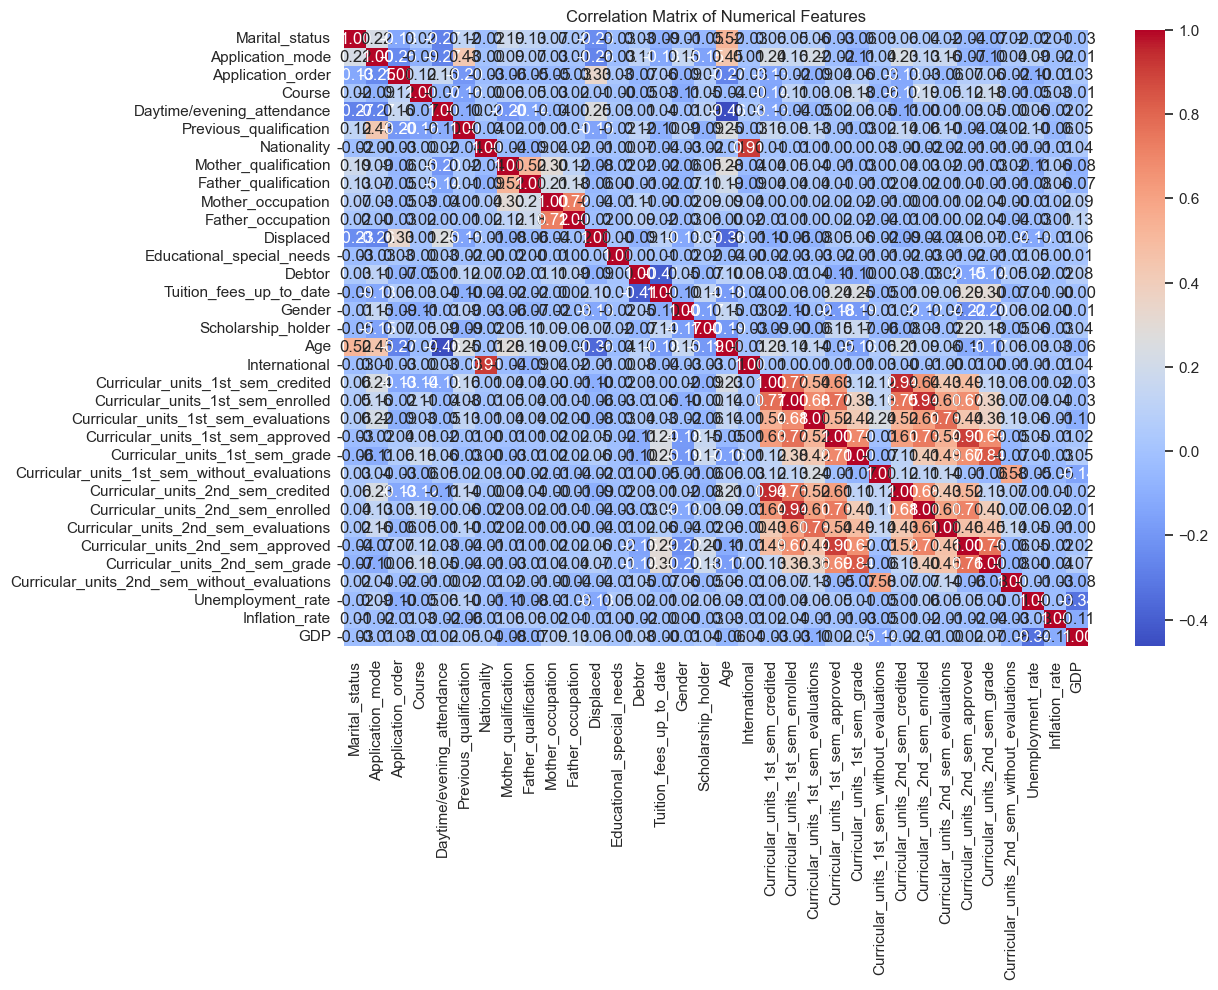

In [12]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Compute correlation
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


✅ Step 8: Boxplots to Detect Outliers & Distribution by Target

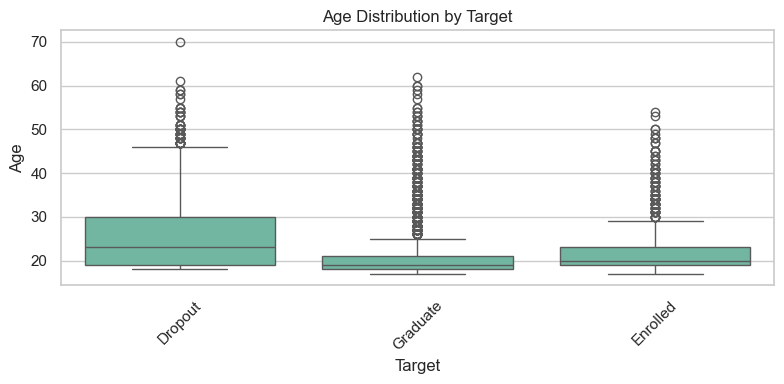

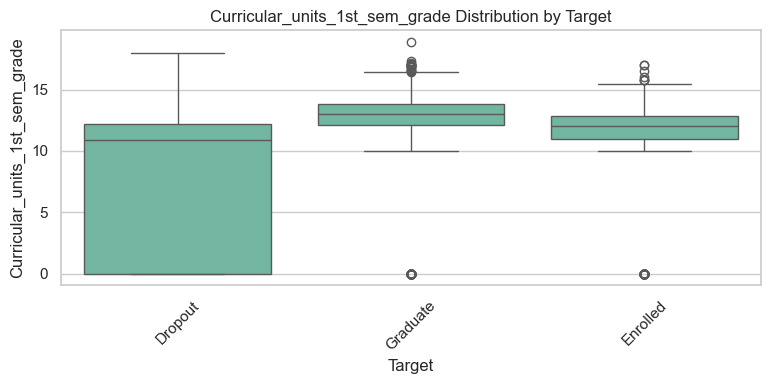

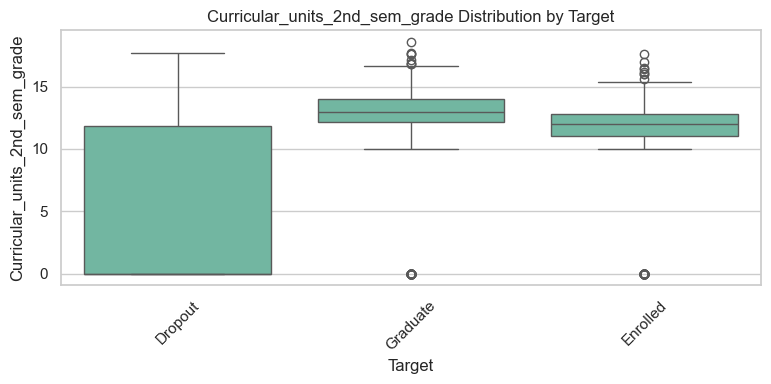

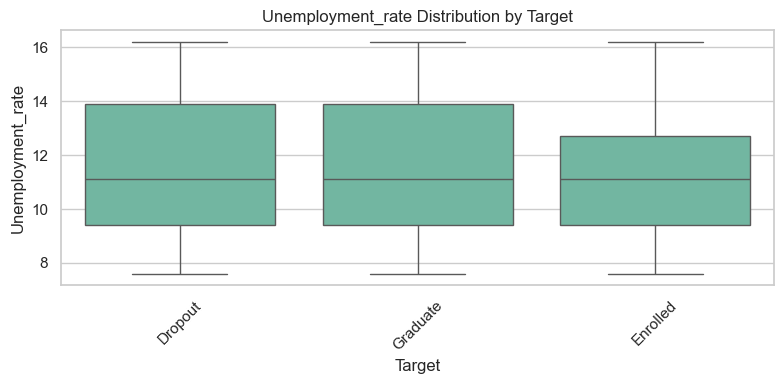

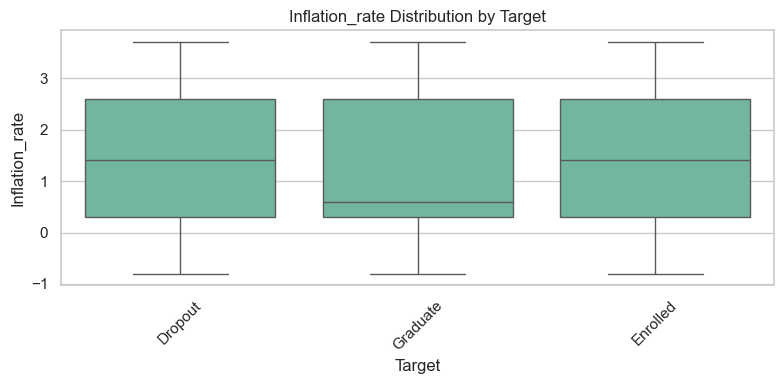

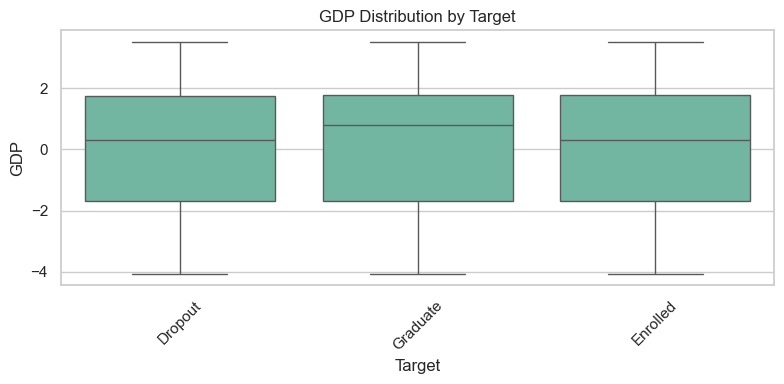

In [15]:
numerical_to_plot = ['Age', 
                     'Curricular_units_1st_sem_grade', 
                     'Curricular_units_2nd_sem_grade', 
                     'Unemployment_rate', 'Inflation_rate', 'GDP']

for col in numerical_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Target', y=col)
    plt.title(f'{col} Distribution by Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


✅ Step-by-Step: Visualize and Cap Outliers
First, let’s visualize again with boxplots:

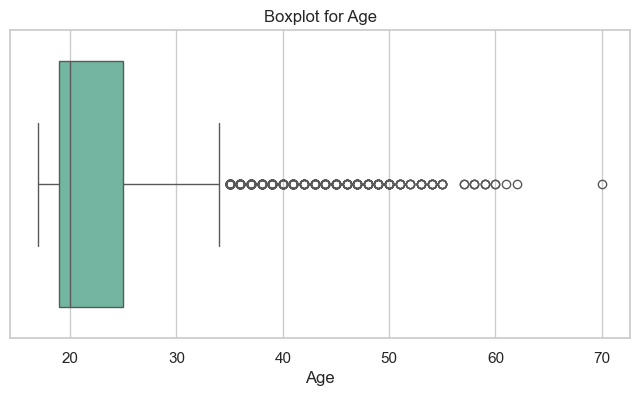

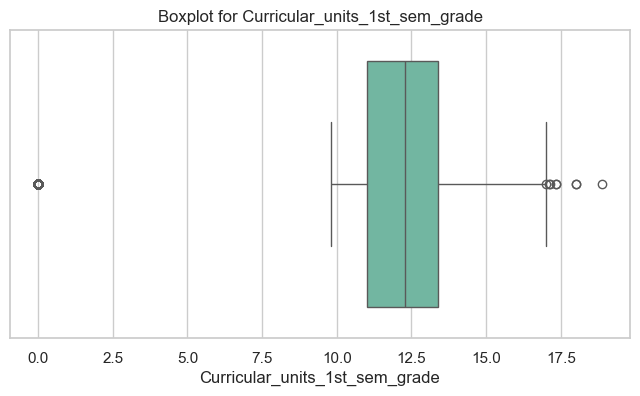

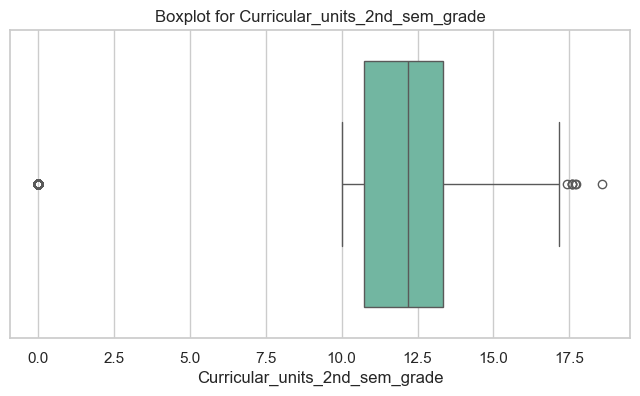

In [16]:
cols_with_outliers = ['Age', 
                     'Curricular_units_1st_sem_grade', 
                     'Curricular_units_2nd_sem_grade']

for col in cols_with_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


✅ Winsorization (Capping at 1st and 99th percentile)
This will limit extreme values without deleting any data points:

In [17]:
def cap_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return np.clip(series, lower, upper)

df['Age'] = cap_outliers(df['Age'])
df['Curricular_units_1st_sem_grade'] = cap_outliers(df['Curricular_units_1st_sem_grade'])
df['Curricular_units_2nd_sem_grade'] = cap_outliers(df['Curricular_units_2nd_sem_grade'])


✅ Re-check Boxplots After Capping

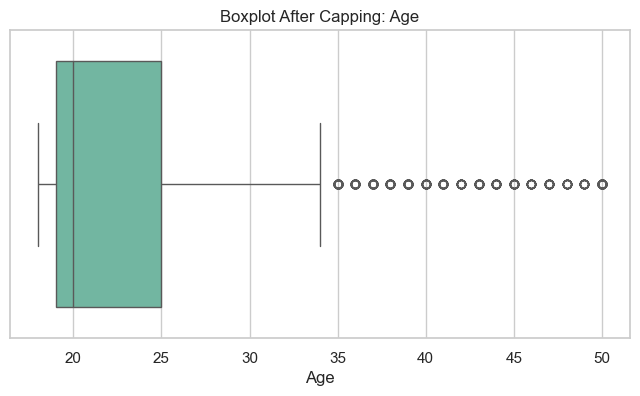

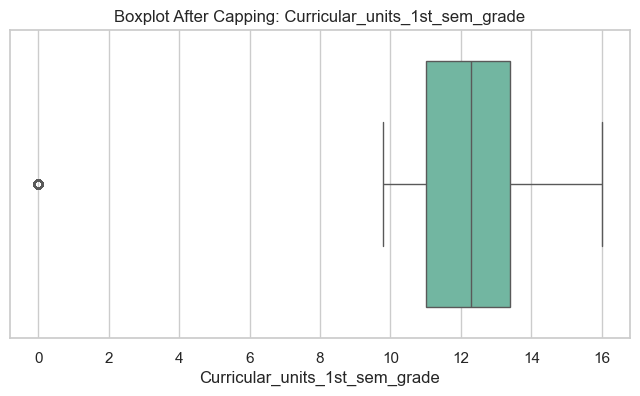

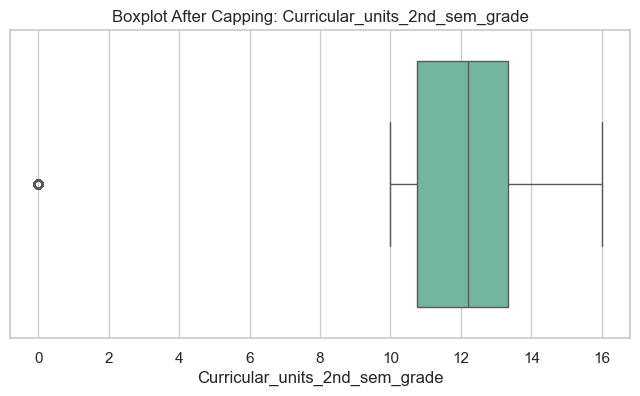

In [18]:
for col in cols_with_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot After Capping: {col}')
    plt.show()


✅ Step 9: Pairplot (optional but heavy)
If you want to see how numerical features vary together by class:

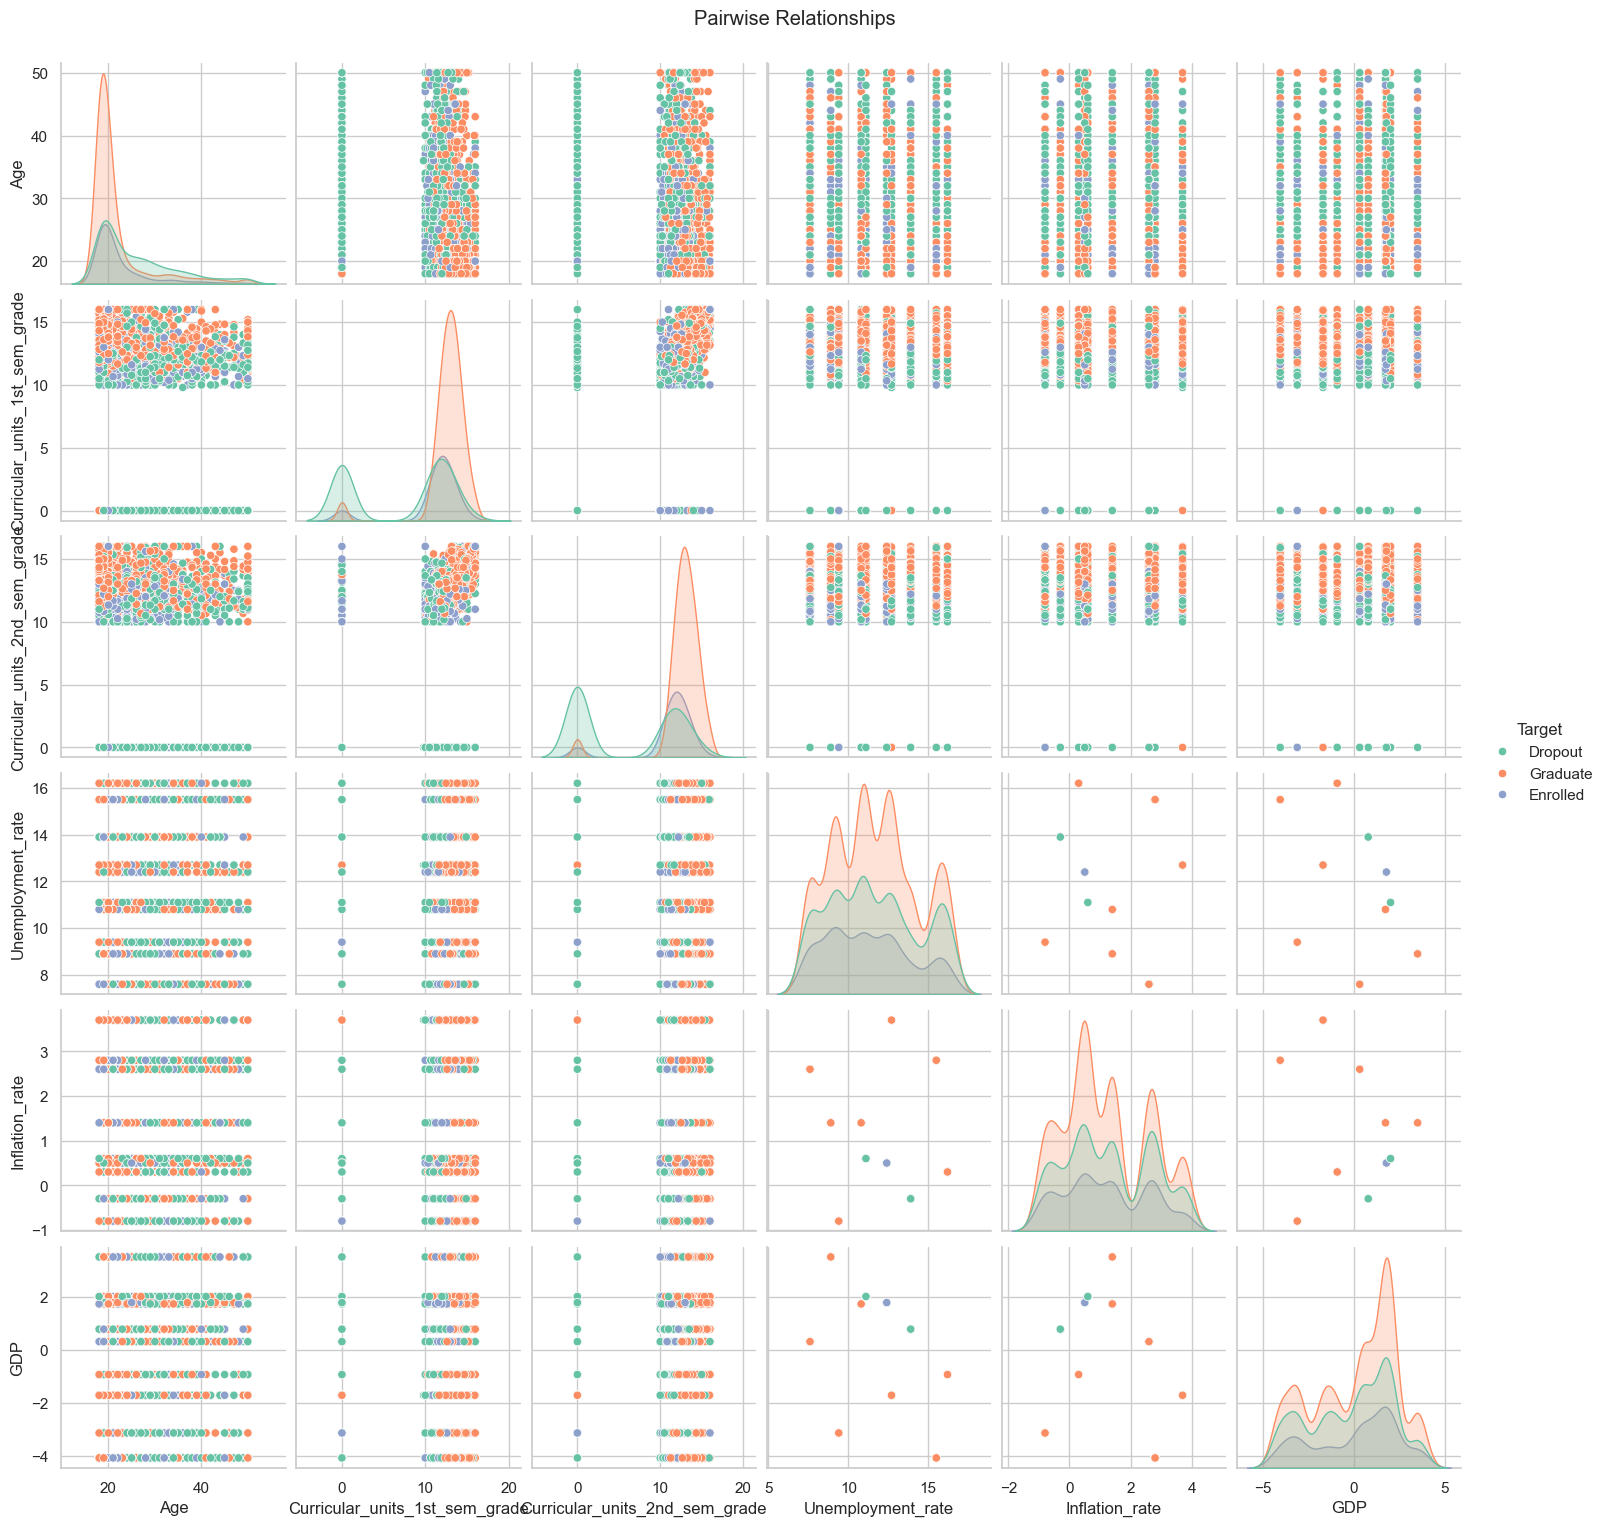

In [19]:
sns.pairplot(df, vars=numerical_to_plot, hue='Target')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


MODEL BUILDING 

✅ Step 1: Import Libraries

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


✅ Step 2: Preprocessing

In [22]:
# Make a copy to avoid modifying original
df_model = df.copy()

# Encode categorical variables
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Target')  # exclude target from encoding

le = LabelEncoder()
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Encode target as well
df_model['Target'] = le.fit_transform(df_model['Target'])

# Features & Target
X = df_model.drop('Target', axis=1)
y = df_model['Target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


✅ Step 3: Train All Models

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🟢 Logistic Regression Accuracy: 0.7582
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       284
           1       0.50      0.32      0.39       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



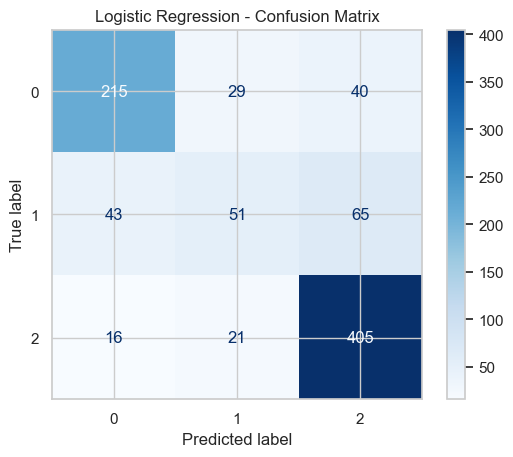


🟢 Decision Tree Accuracy: 0.6746
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       284
           1       0.37      0.42      0.39       159
           2       0.79      0.77      0.78       442

    accuracy                           0.67       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.68      0.67      0.68       885



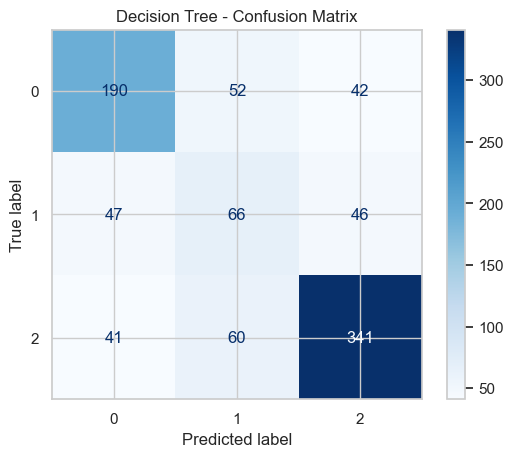


🟢 Random Forest Accuracy: 0.7740
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       284
           1       0.53      0.36      0.43       159
           2       0.80      0.94      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



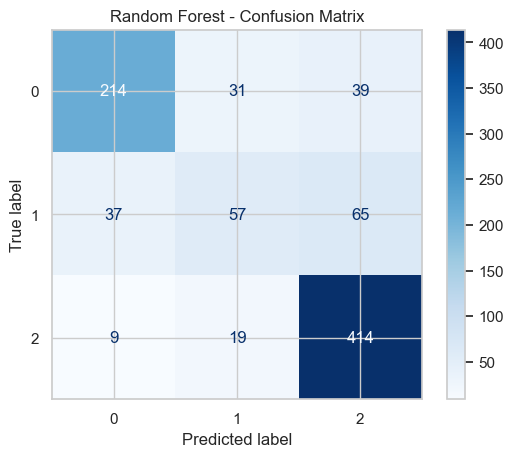

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🟢 XGBoost Accuracy: 0.7571
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       284
           1       0.50      0.43      0.46       159
           2       0.81      0.89      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



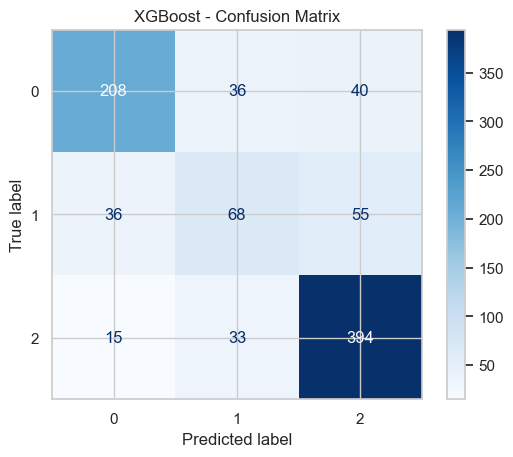

In [23]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n🟢 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    
    # Save results for plotting
    results[name] = {
        "model": model,
        "accuracy": acc,
        "preds": preds
    }

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


✅ Step 4: Compare Accuracies

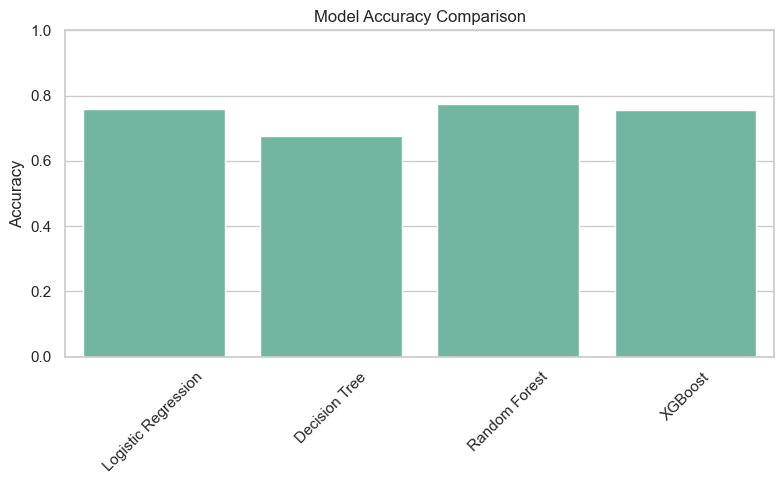

In [24]:
# Bar chart of accuracies
accuracy_scores = {name: results[name]["accuracy"] for name in results}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔍 Summary
This code:

* Encodes categorical features

* Splits and scales data

* Trains 4 models

* Displays accuracy, classification reports, and confusion matrices

* Plots comparison of model performance

✅ Step 1: Import Required Libraries

In [25]:
from sklearn.model_selection import GridSearchCV


✅ Step 2: Define Hyperparameter Grids

In [26]:
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'saga'],
        'multi_class': ['multinomial']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'criterion': ['gini', 'entropy']
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }
}


✅ Step 3: Grid Search Function

In [27]:
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_


✅ Step 4: Apply to All Models

In [28]:
best_models = {}

for name in models:
    print(f"\n🔍 Tuning {name}...")
    best_model, best_params, best_score = perform_grid_search(models[name], param_grids[name], X_train, y_train)
    
    best_models[name] = {
        "model": best_model,
        "params": best_params,
        "cv_score": best_score
    }

    print(f"✅ Best {name} Params: {best_params}")
    print(f"✅ Best CV Accuracy: {best_score:.4f}")



🔍 Tuning Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Best Logistic Regression Params: {'C': 0.1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
✅ Best CV Accuracy: 0.7635

🔍 Tuning Decision Tree...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
✅ Best CV Accuracy: 0.7420

🔍 Tuning Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Best Random Forest Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
✅ Best CV Accuracy: 0.7672

🔍 Tuning XGBoost...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:06:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
✅ Best CV Accuracy: 0.7754


✅ Step 5: Evaluate Tuned Models on Test Data


🧪 Logistic Regression - Test Accuracy after Tuning: 0.7627
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       284
           1       0.53      0.33      0.41       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



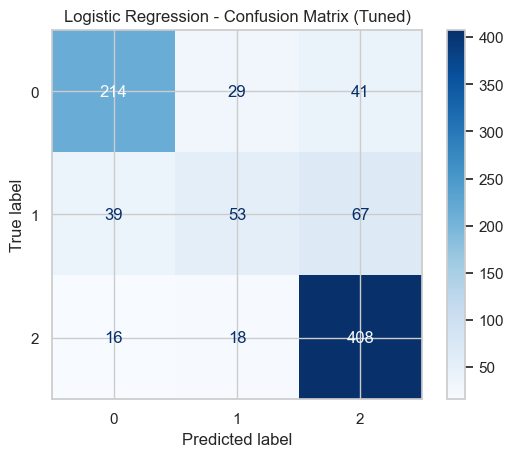


🧪 Decision Tree - Test Accuracy after Tuning: 0.7559
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       284
           1       0.55      0.34      0.42       159
           2       0.75      0.96      0.84       442

    accuracy                           0.76       885
   macro avg       0.72      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



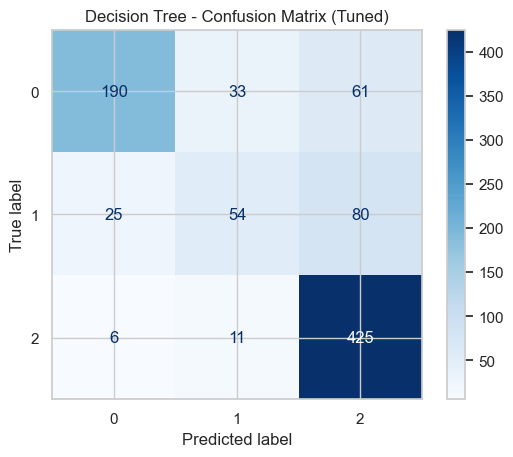


🧪 Random Forest - Test Accuracy after Tuning: 0.7774
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       284
           1       0.58      0.36      0.44       159
           2       0.79      0.94      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.76      0.78      0.76       885



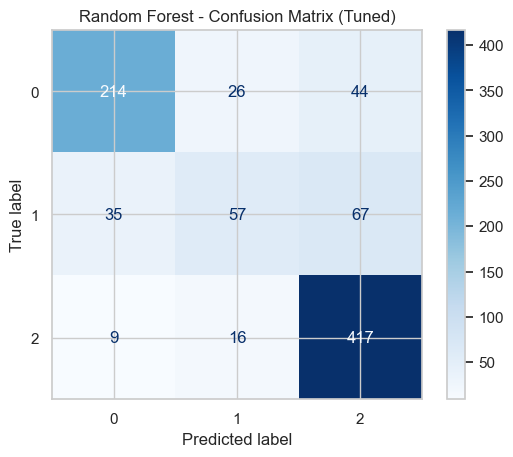


🧪 XGBoost - Test Accuracy after Tuning: 0.7616
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       284
           1       0.53      0.40      0.45       159
           2       0.79      0.91      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



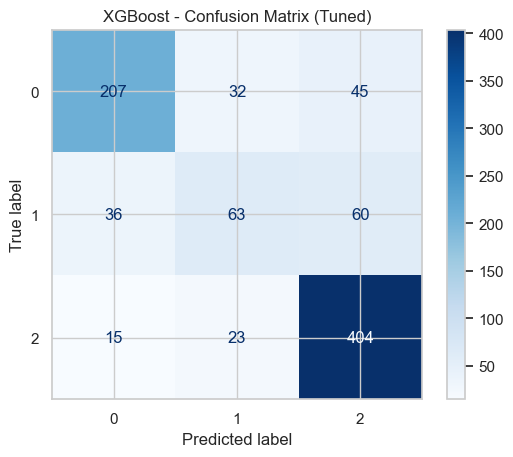

In [29]:
final_results = {}

for name, info in best_models.items():
    model = info["model"]
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    
    print(f"\n🧪 {name} - Test Accuracy after Tuning: {acc:.4f}")
    print(classification_report(y_test, preds))
    
    final_results[name] = acc
    
    ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues')
    plt.title(f'{name} - Confusion Matrix (Tuned)')
    plt.show()


✅ Step 6: Plot Final Accuracies

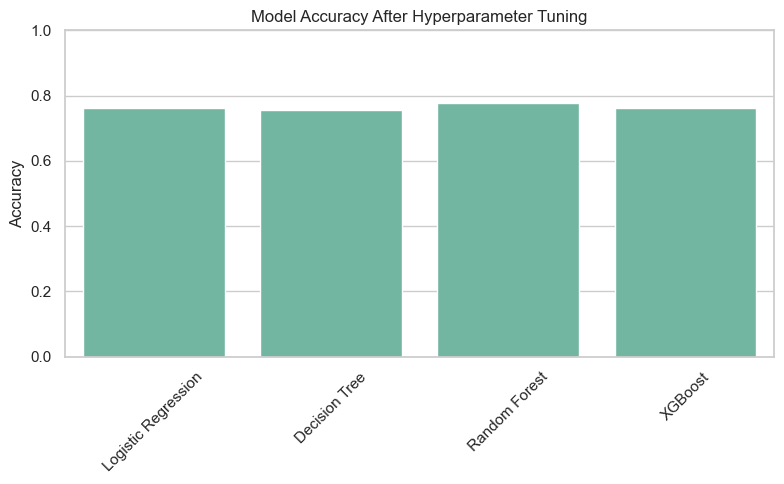

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(final_results.keys()), y=list(final_results.values()))
plt.title("Model Accuracy After Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Explore feature importance

In [31]:
# Get the feature names
feature_names = X.columns

# Plot feature importance for each model
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title(f'Top 15 Feature Importances - {model_name}')
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


Step 2: Apply to Best Tuned Models

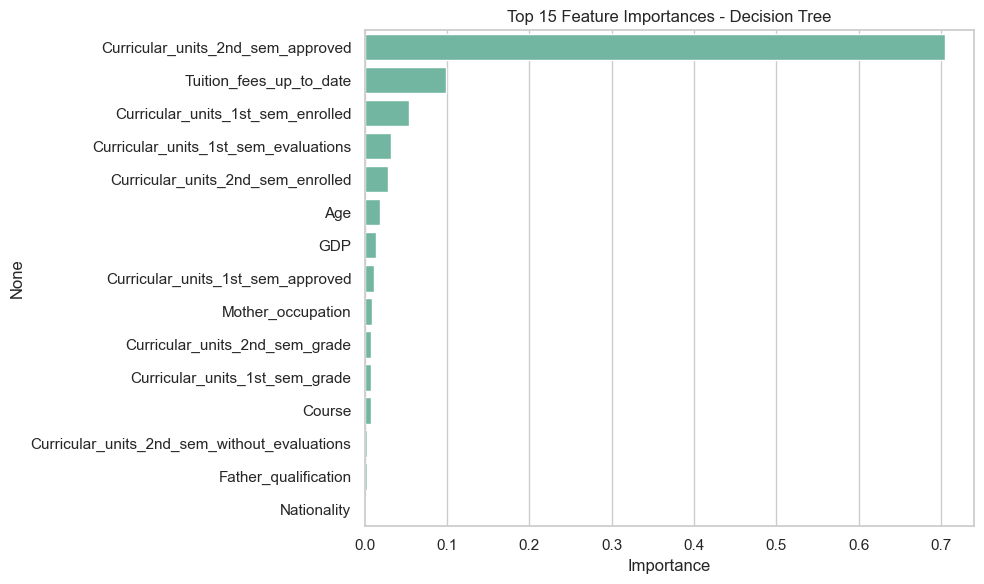

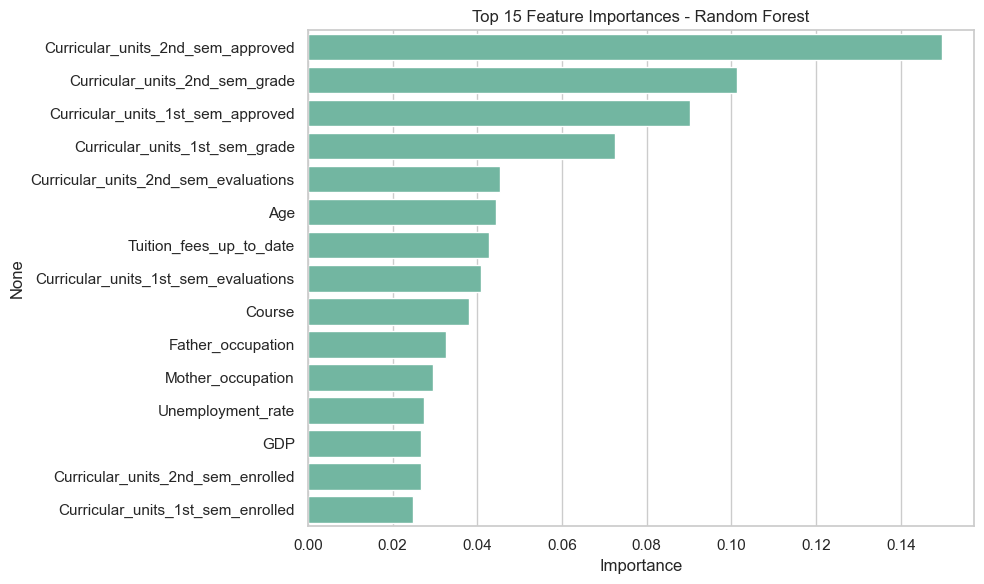

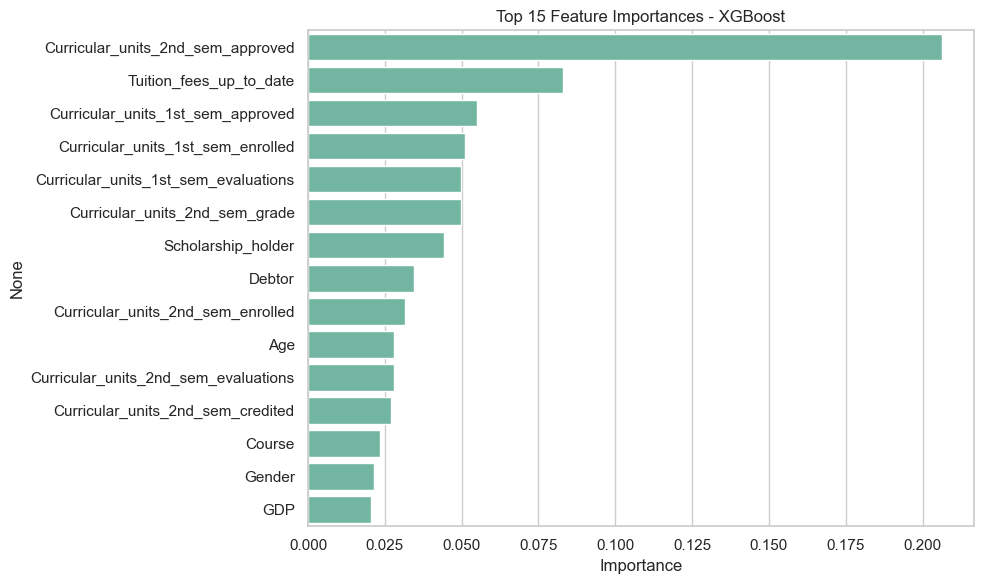

In [32]:
for name in ['Decision Tree', 'Random Forest', 'XGBoost']:
    model = best_models[name]["model"]
    plot_feature_importance(model, name)


Nice choice! Feature selection can improve model performance, reduce overfitting, and speed up training. Let’s use Recursive Feature Elimination (RFE) with a model like Random Forest or Logistic Regression to find the most useful features.

✅ Step 1: Import RFE

In [33]:
from sklearn.feature_selection import RFE


✅ Step 2: Run RFE with Random Forest
We’ll use Random Forest for RFE because it's robust and handles both linear and nonlinear interactions.

In [34]:
# Use the best tuned Random Forest model
rf_model = best_models['Random Forest']['model']

# Recursive Feature Elimination
rfe = RFE(estimator=rf_model, n_features_to_select=15)  # select top 15
rfe.fit(X_train, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print("✅ Selected Features by RFE:\n", selected_features.tolist())


✅ Selected Features by RFE:
 ['Course', 'Father_qualification', 'Mother_occupation', 'Father_occupation', 'Tuition_fees_up_to_date', 'Age', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Unemployment_rate', 'GDP']


✅ Step 3: Train Models Again Using Selected Features


🎯 Accuracy after RFE (Random Forest): 0.7638
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       284
           1       0.52      0.40      0.45       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



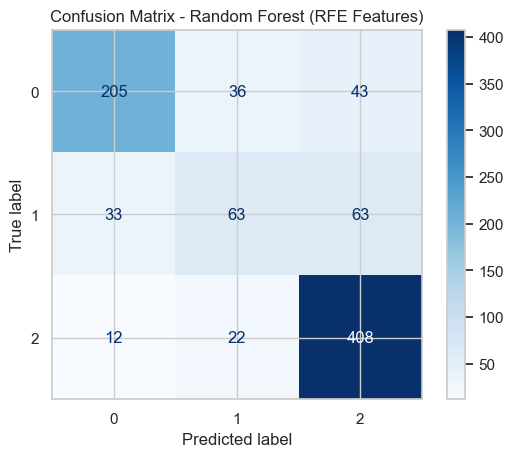

In [35]:
# Subset data with selected features
X_train_rfe = X_train[:, rfe.support_]
X_test_rfe = X_test[:, rfe.support_]

# Train Random Forest again with selected features
rf_model_rfe = RandomForestClassifier(random_state=42)
rf_model_rfe.fit(X_train_rfe, y_train)
preds_rfe = rf_model_rfe.predict(X_test_rfe)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

acc_rfe = accuracy_score(y_test, preds_rfe)
print(f"\n🎯 Accuracy after RFE (Random Forest): {acc_rfe:.4f}")
print(classification_report(y_test, preds_rfe))

ConfusionMatrixDisplay.from_predictions(y_test, preds_rfe, cmap='Blues')
plt.title("Confusion Matrix - Random Forest (RFE Features)")
plt.show()


✅ Step 4: Visualize Importance of Selected Features

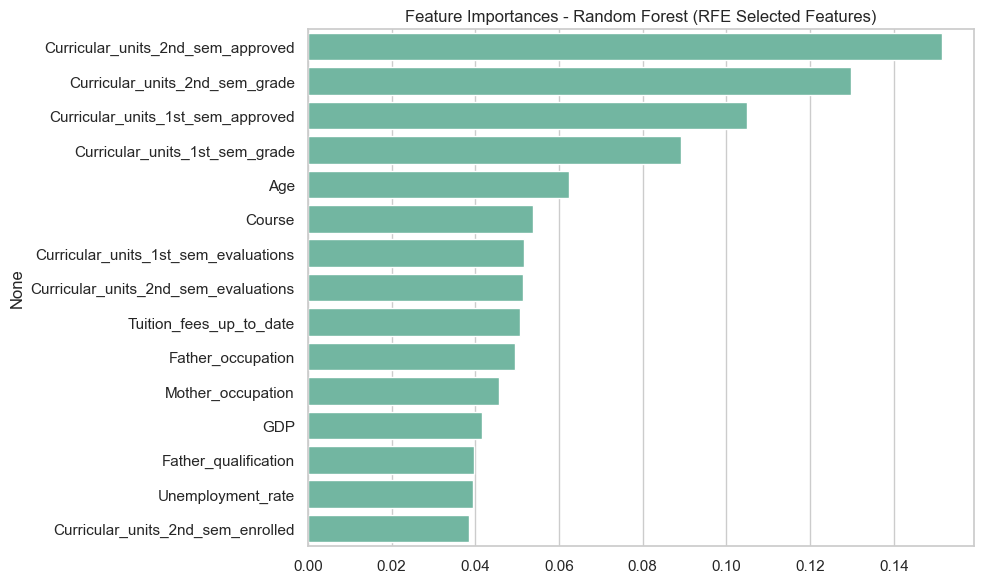

In [36]:
importances = rf_model_rfe.feature_importances_
feat_imp = pd.Series(importances, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances - Random Forest (RFE Selected Features)")
plt.tight_layout()
plt.show()


🔄 Re-train all models using only selected features

✅ Step 1: Prepare Reduced Dataset

In [37]:
# Use the selected features from RFE
X_selected = df_model[selected_features]
y = df_model['Target']

# Scale features again
X_selected_scaled = scaler.fit_transform(X_selected)

# Train-test split
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected_scaled, y, test_size=0.2, stratify=y, random_state=42
)


✅ Step 2: Define Models Again

In [38]:
# Redefine models to re-train from scratch
models_reduced = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


✅ Step 3: Train and Evaluate on Reduced Features


🔁 Logistic Regression - Accuracy with Selected Features: 0.7571
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       284
           1       0.50      0.32      0.39       159
           2       0.78      0.93      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


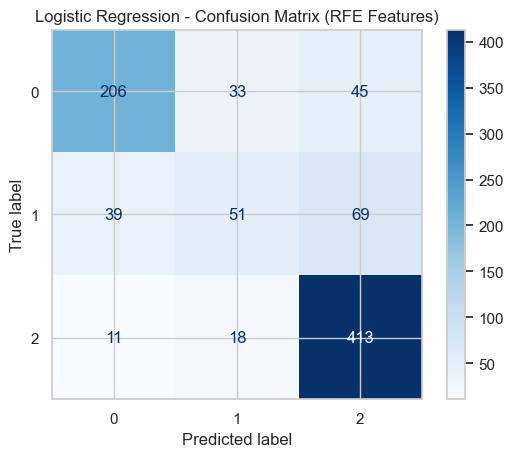


🔁 Decision Tree - Accuracy with Selected Features: 0.6599
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       284
           1       0.35      0.35      0.35       159
           2       0.77      0.78      0.77       442

    accuracy                           0.66       885
   macro avg       0.59      0.59      0.59       885
weighted avg       0.66      0.66      0.66       885



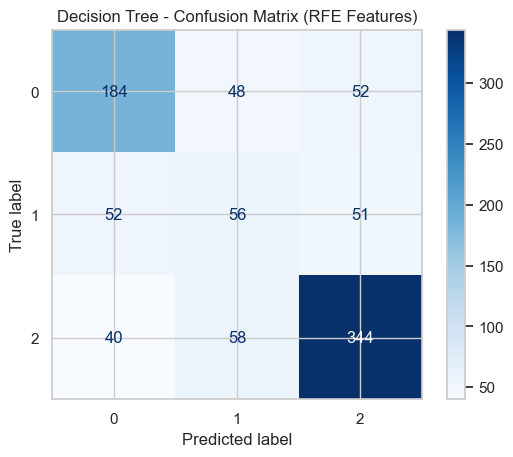


🔁 Random Forest - Accuracy with Selected Features: 0.7638
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       284
           1       0.52      0.40      0.45       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



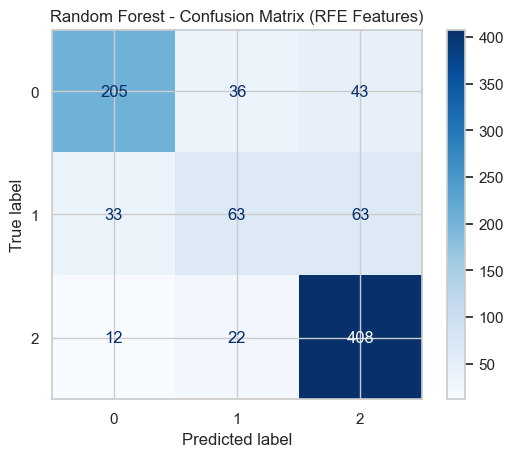

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔁 XGBoost - Accuracy with Selected Features: 0.7684
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       284
           1       0.54      0.46      0.49       159
           2       0.82      0.90      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.76      0.77      0.76       885



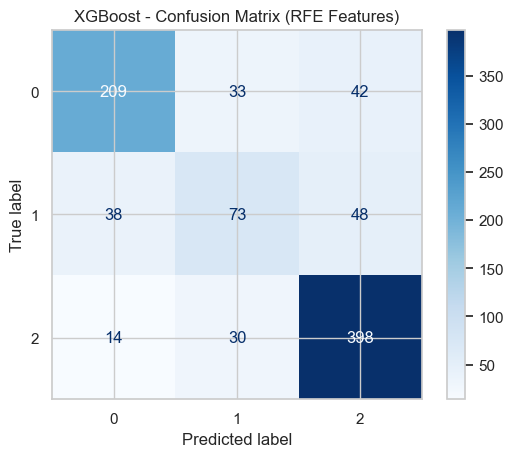

In [39]:
reduced_results = {}

for name, model in models_reduced.items():
    model.fit(X_train_sel, y_train_sel)
    preds = model.predict(X_test_sel)
    acc = accuracy_score(y_test_sel, preds)

    print(f"\n🔁 {name} - Accuracy with Selected Features: {acc:.4f}")
    print(classification_report(y_test_sel, preds))
    
    ConfusionMatrixDisplay.from_predictions(y_test_sel, preds, cmap='Blues')
    plt.title(f'{name} - Confusion Matrix (RFE Features)')
    plt.show()
    
    reduced_results[name] = acc


✅ Step 4: Compare Accuracy Before vs After Feature Selection

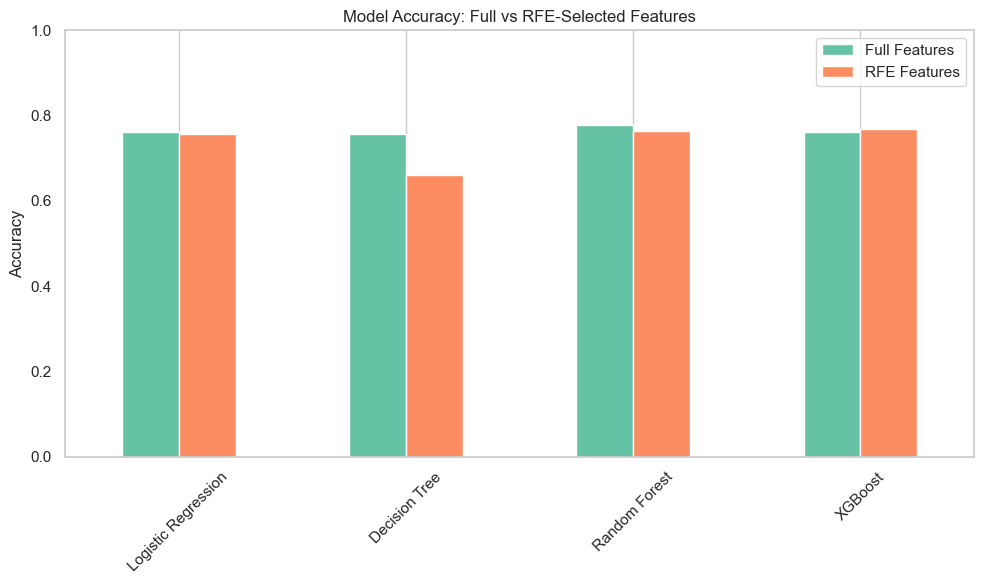

In [40]:
# Accuracy comparison
comparison_df = pd.DataFrame({
    'Full Features': final_results,
    'RFE Features': reduced_results
})

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Accuracy: Full vs RFE-Selected Features")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Build a real-time dashboard

✅ Step 1: Folder Structure
Your project should look like this:

project_folder/
│
├── saved_model/
│   ├── best_model.pkl
│   ├── scaler.pkl
│   └── selected_features.pkl
│
└── app.py  ← (Streamlit code goes here)


✅ Step 2: Streamlit App Code (app.py)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model components
model = joblib.load("saved_model/best_model.pkl")
scaler = joblib.load("saved_model/scaler.pkl")
selected_features = joblib.load("saved_model/selected_features.pkl")

# App title
st.title("🎓 Student Academic Standing Predictor")

# Sidebar info
st.sidebar.markdown("🔍 Fill in the student's details:")

# Input widgets dynamically created from selected features
def get_user_input():
    inputs = {}
    for feature in selected_features:
        if "grade" in feature or "rate" in feature or "GDP" in feature:
            inputs[feature] = st.sidebar.number_input(f"{feature}", value=0.0)
        elif "enrolled" in feature or "evaluations" in feature or "approved" in feature or "credited" in feature:
            inputs[feature] = st.sidebar.number_input(f"{feature}", value=0)
        elif "Age" in feature:
            inputs[feature] = st.sidebar.slider("Age at Enrollment", 15, 65, 20)
        else:
            inputs[feature] = st.sidebar.selectbox(f"{feature}", [0, 1], index=0)
    return pd.DataFrame([inputs])

# Get user input
input_df = get_user_input()

# Preprocess: scale
input_scaled = scaler.transform(input_df[selected_features])

# Predict
if st.button("🔮 Predict Academic Standing"):
    prediction = model.predict(input_scaled)[0]
    st.success(f"🎯 Predicted Academic Standing: **{prediction}**")


✅ Step 3: Run the App
In your terminal, run

bash
streamlit run app.py


http://localhost:8501/